In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_data = pd.read_csv("https://raw.githubusercontent.com/scherala/LearningML/master/Data/heart.csv")

# Separate features
nominal_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
target_column = ['DEATH_EVENT']
numeric_features = set(heart_data.columns) - set(nominal_features) - set(target_column)

In [3]:
heart_data[numeric_features].describe()

## Questions from looking the distribution of data below:

# 1. Would platelets dominate in the result of the model. 
#    May be in distance based models? Need not worry in tree based models (:-))

,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,time,serum_sodium,age
count,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.39388,581.839465,263358.029264,38.083612,130.260870,136.625418,60.833893
std,1.03451,970.287881,97804.236869,11.834841,77.614208,4.412477,11.894809
min,0.50000,23.000000,25100.000000,14.000000,4.000000,113.000000,40.000000
25%,0.90000,116.500000,212500.000000,30.000000,73.000000,134.000000,51.000000
50%,1.10000,250.000000,262000.000000,38.000000,115.000000,137.000000,60.000000
75%,1.40000,582.000000,303500.000000,45.000000,203.000000,140.000000,70.000000
max,9.40000,7861.000000,850000.000000,80.000000,285.000000,148.000000,95.000000


In [4]:
heart_data[numeric_features]

,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,time,serum_sodium,age
0,1.9,582,265000.00,20,4,130,75.0
1,1.1,7861,263358.03,38,6,136,55.0
2,1.3,146,162000.00,20,7,129,65.0
3,1.9,111,210000.00,20,7,137,50.0
4,2.7,160,327000.00,20,8,116,65.0
...,...,...,...,...,...,...,...
294,1.1,61,155000.00,38,270,143,62.0
295,1.2,1820,270000.00,38,271,139,55.0
296,0.8,2060,742000.00,60,278,138,45.0
297,1.4,2413,140000.00,38,280,140,45.0


### Min-max normalization using pandas

In [5]:
# Min-max scalar without using Sci-kit learn
# Calculation: x(scaled) = [x - min(x)/max(x)- min(x)]
heart_data_numeric = heart_data[numeric_features]
diff = heart_data_numeric.max(axis=0) - heart_data_numeric.min(axis=0)
scaled_data = (heart_data_numeric - heart_data_numeric.min(axis=0)) / diff
scaled_data.describe()

,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,time,serum_sodium,age
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.100436,0.071299,0.288833,0.364903,0.449327,0.675012,0.378798
std,0.116237,0.123793,0.118565,0.179316,0.276207,0.126071,0.216269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044944,0.011929,0.227179,0.242424,0.245552,0.600000,0.200000
50%,0.067416,0.028961,0.287186,0.363636,0.395018,0.685714,0.363636
75%,0.101124,0.071319,0.337495,0.469697,0.708185,0.771429,0.545455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Min-max normalization using sklearn

In [6]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
scaled_data_sklearn = pd.DataFrame(minMaxScaler.fit_transform(heart_data_numeric), columns = heart_data_numeric.columns)
scaled_data_sklearn.describe()

,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,time,serum_sodium,age
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.100436,0.071299,0.288833,0.364903,0.449327,0.675012,0.378798
std,0.116237,0.123793,0.118565,0.179316,0.276207,0.126071,0.216269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044944,0.011929,0.227179,0.242424,0.245552,0.600000,0.200000
50%,0.067416,0.028961,0.287186,0.363636,0.395018,0.685714,0.363636
75%,0.101124,0.071319,0.337495,0.469697,0.708185,0.771429,0.545455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Min-max scaling to a particular range

In [7]:
# Want a range of [-1,1] instead of [0,1]
def interpolate(x):
    return np.interp(x, (x.min(), x.max()), (-1, +1))

# axis=0 means apply to columns; axis=1 to rows
scaled_data_range = heart_data_numeric.apply(interpolate , axis = 0)
scaled_data_range.describe()

,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,time,serum_sodium,age
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,-0.799128,-0.857403,-0.422335,-0.270194,-0.101346,0.350024,-0.242404
std,0.232474,0.247586,0.237130,0.358632,0.552414,0.252142,0.432539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.910112,-0.976142,-0.545642,-0.515152,-0.508897,0.200000,-0.600000
50%,-0.865169,-0.942077,-0.425627,-0.272727,-0.209964,0.371429,-0.272727
75%,-0.797753,-0.857362,-0.325009,-0.060606,0.416370,0.542857,0.090909
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Z-score normalization

1. Using Pandas
2. Using sklearn
3. Using a variant of Z-score 

### Using Pandas

In [8]:
# Why to use Z-score instead of Min-Max?
# 1. Sometimes Min and Max values might not be available.
# 2. presence of outliers can bias the min-max normalization by grouping the values
#    and limiting the digital precision available to represent the values.

z_score_normalized = (heart_data_numeric - heart_data_numeric.mean())/heart_data_numeric.std()
z_score_normalized.describe()

,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,time,serum_sodium,age
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,4.026879e-16,-2.135044e-17,-1.114679e-15,4.752794e-17,-6.052386e-16,-8.420429e-16,6.735601e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.640608e-01,-5.759522e-01,-2.436071e+00,-2.034976e+00,-1.626775e+00,-5.354230e+00,-1.751511e+00
25%,-4.774043e-01,-4.795891e-01,-5.199982e-01,-6.830351e-01,-7.377627e-01,-5.949987e-01,-8.267382e-01
50%,-2.840761e-01,-3.420010e-01,-1.388518e-02,-7.064906e-03,-1.966247e-01,8.489153e-02,-7.010562e-02
75%,5.916232e-03,1.654510e-04,4.104318e-01,5.844090e-01,9.371883e-01,7.647817e-01,7.705972e-01
max,7.739045e+00,7.502063e+00,5.998124e+00,3.541779e+00,1.993696e+00,2.577822e+00,2.872354e+00


In [9]:
ax = z_score_normalized.plot.kde()

### Using Sklearn

In [10]:
# Using standar scaler in sklearn
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardized_data_sklearn = pd.DataFrame(standardScaler.fit_transform(heart_data_numeric), columns = heart_data_numeric.columns)
standardized_data_sklearn.describe()

,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,time,serum_sodium,age
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,-2.227872e-18,3.713120e-18,1.009969e-16,3.341808e-18,-1.069379e-16,-8.627435e-16,5.265205e-16
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-8.655094e-01,-5.769178e-01,-2.440155e+00,-2.038387e+00,-1.629502e+00,-5.363206e+00,-1.754448e+00
25%,-4.782047e-01,-4.803931e-01,-5.208700e-01,-6.841802e-01,-7.389995e-01,-5.959961e-01,-8.281242e-01
50%,-2.845524e-01,-3.425744e-01,-1.390846e-02,-7.076750e-03,-1.969543e-01,8.503384e-02,-7.022315e-02
75%,5.926150e-03,1.657284e-04,4.111199e-01,5.853888e-01,9.387595e-01,7.660638e-01,7.718891e-01
max,7.752020e+00,7.514640e+00,6.008180e+00,3.547716e+00,1.997038e+00,2.582144e+00,2.877170e+00


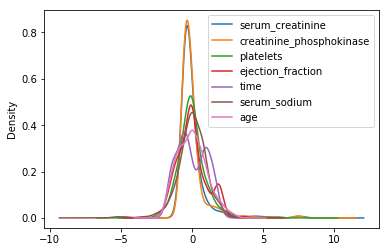

In [11]:
ax = standardized_data_sklearn.plot.kde()

### Using Mean Absolute Deviation

In [12]:
# Using Mean absolute deviation
# An advantage of the mean absolute deviation is that it is more robust to outliers
# than the standard deviation σA as the deviations from the mean calculated by |vi − A|
# are not squared

z_score_normalized_mad = (heart_data_numeric - heart_data_numeric.mean())/heart_data_numeric.mad()
z_score_normalized_mad.describe()

,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,time,serum_sodium,age
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.068409e-16,-5.495418e-17,-1.623376e-15,-6.535092e-17,-2.376397e-16,-1.185599e-15,7.151470e-16
std,1.799708e+00,1.890874e+00,1.461740e+00,1.322138e+00,1.139446e+00,1.374494e+00,1.248416e+00
min,-1.555057e+00,-1.089053e+00,-3.560903e+00,-2.690520e+00,-1.853622e+00,-7.359359e+00,-2.186614e+00
25%,-8.591884e-01,-9.068424e-01,-7.601024e-01,-9.030670e-01,-8.406407e-01,-8.178223e-01,-1.032113e+00
50%,-5.112540e-01,-6.466808e-01,-2.029652e-02,-9.340784e-03,-2.240432e-01,1.166829e-01,-8.752096e-02
75%,1.064749e-02,3.128470e-04,5.999447e-01,7.726697e-01,1.067875e+00,1.051188e+00,9.620258e-01
max,1.392802e+01,1.418545e+01,8.767700e+00,4.682722e+00,2.271709e+00,3.543202e+00,3.585893e+00


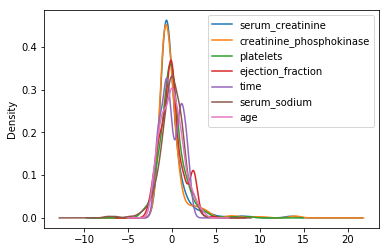

In [13]:
ax = z_score_normalized_mad.plot.kde()

### Decimal Scaling

In [14]:
def apply_decimal_scaling(x):
    exponent = len(str(max(x)))
    return x/10**exponent

decimal_scaled_df = heart_data_numeric.apply(apply_decimal_scaling , axis = 0)
decimal_scaled_df.describe()

,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,time,serum_sodium,age
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.001394,0.058184,0.002634,0.380836,0.130261,0.136625,0.006083
std,0.001035,0.097029,0.000978,0.118348,0.077614,0.004412,0.001189
min,0.000500,0.002300,0.000251,0.140000,0.004000,0.113000,0.004000
25%,0.000900,0.011650,0.002125,0.300000,0.073000,0.134000,0.005100
50%,0.001100,0.025000,0.002620,0.380000,0.115000,0.137000,0.006000
75%,0.001400,0.058200,0.003035,0.450000,0.203000,0.140000,0.007000
max,0.009400,0.786100,0.008500,0.800000,0.285000,0.148000,0.009500
